# **Task 2: Experimentation and uplift testing**

*(1) `Data requirements specifications`*

*(2) `Data collections`*

*(3) `Data preparations`*

*(4) `Data exploratory`*

*(5) `Modeling & Evaluation`*

*(6) `Communication of insights`*

## **1. Data requirements specifications**
Extend your analysis from Task 1 to help you identify benchmark stores that allow you to test the impact of the trial store layouts on customer sales.

Select `control stores`: We would want to match trial stores to control stores that are similar to trial store prior to the trial period of Feb 2019 in term of:

- Total sales

- Number of customers

- Transactions per customer

- Chips per customer

- The average price per unit

Assessment of trial

- This one should give you some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. We want to know if the trial stores were successful or not.

- Once you have selected your control stores, compare each trial and control pair during the trial period. You want to test if total sales are significantly different in the trial period and if so, check if the driver of change is more purchasing customers or more purchases per customers etc

Conclusions

- Summarise your findings for each store and provide an recommendation that we can share with Julia outlining the impact on sales during the trial period.

## **2. Data collections**

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('ggplot')

In [211]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Máy tính\Personal Project\Quantium\Task 2 - Experimentation and uplift testing\QVI_data.csv')

## **3. Data preparations**

In [212]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [213]:
df.shape

(264834, 12)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [215]:
df = df.sort_values(by='DATE', ascending=True).reset_index(drop=True)
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,104039,2018-07-01,104,103937,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Premium
1,118107,2018-07-01,118,121300,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,COBS,RETIREES,Mainstream
2,226024,2018-07-01,226,226348,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
3,152040,2018-07-01,152,150459,25,Pringles SourCream Onion 134g,2,7.4,134,PRINGLES,YOUNG FAMILIES,Mainstream
4,33140,2018-07-01,33,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream


In [216]:
#remove products are not chips
df = df[~df['PROD_NAME'].isin([
    'Old El Paso Salsa   Dip Tomato Mild 300g',
    'Doritos Salsa       Medium 300g',
    'Old El Paso Salsa   Dip Chnky Tom Ht300g',
    'Woolworths Mild     Salsa 300g',
    'Old El Paso Salsa   Dip Tomato Med 300g',
    'Woolworths Medium   Salsa 300g',
    'Doritos Salsa Mild  300g'
])].reset_index(drop=True)

In [217]:
df['UNIT_PRICE'] = df['TOT_SALES'] / df['PROD_QTY']

In [218]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [219]:
df['YearMonth'] = df['DATE'].map(lambda x: x.year*100 + x.month)
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,UNIT_PRICE,YearMonth
0,104039,2018-07-01,104,103937,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Premium,3.0,201807
1,118107,2018-07-01,118,121300,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,COBS,RETIREES,Mainstream,3.8,201807
2,226024,2018-07-01,226,226348,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,4.6,201807
3,152040,2018-07-01,152,150459,25,Pringles SourCream Onion 134g,2,7.4,134,PRINGLES,YOUNG FAMILIES,Mainstream,3.7,201807
4,33140,2018-07-01,33,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream,2.7,201807


## **4. Data Analysis**

In [220]:
yearMonthMetrics = df.groupby(['YearMonth','STORE_NBR'])\
    .agg({'TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique','TXN_ID':'count','PROD_QTY':'sum','UNIT_PRICE':'mean'})\
    .reset_index()
yearMonthMetrics = yearMonthMetrics.rename(columns={'LYLTY_CARD_NBR':'Numb_of_customers','TXN_ID':'Numb_of_transactions'})
yearMonthMetrics['Trans_per_cust'] = yearMonthMetrics['Numb_of_transactions'] / yearMonthMetrics['Numb_of_customers']
yearMonthMetrics['Chips_per_cust'] = yearMonthMetrics['PROD_QTY'] / yearMonthMetrics['Numb_of_customers']
yearMonthMetrics

,YearMonth,STORE_NBR,TOT_SALES,Numb_of_customers,Numb_of_transactions,PROD_QTY,UNIT_PRICE,Trans_per_cust,Chips_per_cust
0,201807,1,191.6,48,50,59,3.316000,1.041667,1.229167
1,201807,2,143.1,37,39,44,3.207692,1.054054,1.189189
2,201807,3,1164.9,108,134,263,4.432090,1.240741,2.435185
3,201807,4,1318.3,121,152,302,4.369079,1.256198,2.495868
4,201807,5,774.4,88,113,226,3.426549,1.284091,2.568182
...,...,...,...,...,...,...,...,...,...
3161,201906,268,223.2,37,39,56,3.933333,1.054054,1.513514
3162,201906,269,781.0,93,116,232,3.366379,1.247312,2.494624
3163,201906,270,841.6,97,116,232,3.627586,1.195876,2.391753
3164,201906,271,884.2,106,123,246,3.594309,1.160377,2.320755


In [221]:
#filter stores with full observation periods
storesWithFullObs = yearMonthMetrics.groupby('STORE_NBR')['YearMonth'].nunique().reset_index()\
    .query('YearMonth == 12')

yearMonthMetrics = yearMonthMetrics.loc[yearMonthMetrics['STORE_NBR'].isin(storesWithFullObs['STORE_NBR'].values),:]
yearMonthMetrics = yearMonthMetrics.reset_index(drop=True)
yearMonthMetrics #df contaions all stores with full observations periods

,YearMonth,STORE_NBR,TOT_SALES,Numb_of_customers,Numb_of_transactions,PROD_QTY,UNIT_PRICE,Trans_per_cust,Chips_per_cust
0,201807,1,191.6,48,50,59,3.316000,1.041667,1.229167
1,201807,2,143.1,37,39,44,3.207692,1.054054,1.189189
2,201807,3,1164.9,108,134,263,4.432090,1.240741,2.435185
3,201807,4,1318.3,121,152,302,4.369079,1.256198,2.495868
4,201807,5,774.4,88,113,226,3.426549,1.284091,2.568182
...,...,...,...,...,...,...,...,...,...
3103,201906,268,223.2,37,39,56,3.933333,1.054054,1.513514
3104,201906,269,781.0,93,116,232,3.366379,1.247312,2.494624
3105,201906,270,841.6,97,116,232,3.627586,1.195876,2.391753
3106,201906,271,884.2,106,123,246,3.594309,1.160377,2.320755


In [222]:
#filter to the pre-trial periods
preTrialsMeasures = yearMonthMetrics.loc[yearMonthMetrics['YearMonth']<201902,:]
preTrialsMeasures = preTrialsMeasures.reset_index(drop=True)
preTrialsMeasuresFullObs = preTrialsMeasures.drop(['Numb_of_transactions','PROD_QTY'],axis=1)
preTrialsMeasuresFullObs #pretrial full observations dataframe

,YearMonth,STORE_NBR,TOT_SALES,Numb_of_customers,UNIT_PRICE,Trans_per_cust,Chips_per_cust
0,201807,1,191.6,48,3.316000,1.041667,1.229167
1,201807,2,143.1,37,3.207692,1.054054,1.189189
2,201807,3,1164.9,108,4.432090,1.240741,2.435185
3,201807,4,1318.3,121,4.369079,1.256198,2.495868
4,201807,5,774.4,88,3.426549,1.284091,2.568182
...,...,...,...,...,...,...,...
1808,201901,268,153.2,36,3.552778,1.000000,1.222222
1809,201901,269,923.0,104,3.418519,1.298077,2.596154
1810,201901,270,1009.8,110,3.458219,1.327273,2.654545
1811,201901,271,784.0,85,3.596330,1.282353,2.564706


In [223]:
#Now we need to work out a way of ranking how similar each potential control store is to the trial store.
#Calculate how correlated the performance of each store is to the trial store.

def calCorrTable(metricsCol, storeComparison, inputTable=preTrialsMeasuresFullObs):
    """Calculate correlation for a measure, looping through each control store
    Args:
        metricsCol (str): Name of column containing store's metrics to perform correlation test on
        storeComparition (int): Trial store number
        inputTable (dataframe): Metric table with potential comparision stores
        
    Return:
        DataFrame: Monthly correlation table between Trial and each Control store.
    """
    control_stores_nbr = inputTable[~inputTable['STORE_NBR'].isin([77,86,88])]['STORE_NBR'].unique()
    corrs = pd.DataFrame(columns=['YearMonth','Trial_str','Ctrl_str','Corr_score'])
    trial_store = inputTable[inputTable['STORE_NBR'] == storeComparison][metricsCol].reset_index()
    for control in control_stores_nbr:
        concat_df = pd.DataFrame(columns=['YearMonth','Trial_str','Ctrl_str','Corr_score'])
        control_store = inputTable[inputTable['STORE_NBR'] == control][metricsCol].reset_index()
        concat_df['Corr_score'] = trial_store.corrwith(control_store, axis=1)
        concat_df['Trial_str'] = storeComparison
        concat_df['Ctrl_str'] = control
        concat_df['YearMonth'] = list(inputTable[inputTable['STORE_NBR']==storeComparison]['YearMonth'])
        corrs = pd.concat([corrs,concat_df])
    return corrs

In [224]:
corr_table = pd.DataFrame()
for trial_num in [77,86,88]:
    corr_table = pd.concat([corr_table, calCorrTable(['TOT_SALES','Numb_of_customers','Trans_per_cust',
                                                      'Chips_per_cust','UNIT_PRICE'],trial_num)])
corr_table

,YearMonth,Trial_str,Ctrl_str,Corr_score
0,201807,77,1,0.955235
1,201808,77,1,0.995069
2,201809,77,1,0.990480
3,201810,77,1,0.999958
4,201811,77,1,0.999670
...,...,...,...,...
2,201809,88,272,0.567322
3,201810,88,272,0.739503
4,201811,88,272,0.754786
5,201812,88,272,0.837437


In [225]:
#Apart from correlation, we can also calculate a standardized metric
#based on the absolute difference between the trial store's performance and each control store's performance

def calculateMagnitudeDistance(metricsCol, storeComparison, inputTable=preTrialsMeasuresFullObs):
    """Calculate standardized magnitude distance for a measure, looping through each control store.
    Args:
        metricsCol (str): Name of column containing store's metrics to perform correlation test on.
        storeComparision (int): Trial store number.
        inputTable (dataframe): Metric table with potential comparision stores.
    
    Return:
        DataFrame: Monthly magnitude-distance table between Trial and each Control store
    """
    control_stores_nbrs = inputTable[~inputTable['STORE_NBR'].isin([77,86,88])]['STORE_NBR'].unique()
    dists = pd.DataFrame()
    #trial_stores = inputTable[inputTable['STORE_NBR']==storeComparision][metricsCol].reset_index()
    for control in control_stores_nbrs:
        concat_df = abs(inputTable[inputTable['STORE_NBR']==storeComparison].reset_index()[metricsCol] - inputTable[inputTable['STORE_NBR']==control].reset_index()[metricsCol])
        concat_df['YearMonth'] = list(inputTable[inputTable['STORE_NBR']==storeComparison]['YearMonth'])
        concat_df['Trial_str'] = storeComparison
        concat_df['Ctrl_str'] = control
        dists = pd.concat([dists,concat_df])
    for col in metricsCol:
        dists[col] = 1 - ((dists[col] - dists[col].min()) / (dists[col].max() - dists[col].min()))
    dists['magnitude'] = dists[metricsCol].mean(axis=1)
    return dists

In [226]:
dists_table = pd.DataFrame()
for trial_num1 in [77,86,88]:
    dists_table = pd.concat([dists_table, calculateMagnitudeDistance(['TOT_SALES','Numb_of_customers','Trans_per_cust',
                                                      'Chips_per_cust','UNIT_PRICE'],trial_num1)])
dists_table

,TOT_SALES,Numb_of_customers,Trans_per_cust,Chips_per_cust,UNIT_PRICE,YearMonth,Trial_str,Ctrl_str,magnitude
0,0.937361,1.000000,0.893002,0.712207,0.885033,201807,77,1,0.885521
1,0.935600,0.940594,1.000000,0.803516,0.905911,201808,77,1,0.917124
2,0.965158,0.841584,0.964838,0.714801,0.728907,201809,77,1,0.843058
3,0.987824,0.960396,0.992867,0.939343,0.750898,201810,77,1,0.926266
4,0.971667,0.940594,0.859531,0.743893,0.800162,201811,77,1,0.863170
...,...,...,...,...,...,...,...,...,...
2,0.209407,0.268293,0.561974,0.797921,0.915917,201809,88,272,0.550702
3,0.358741,0.357724,0.743621,0.861789,0.972746,201810,88,272,0.658924
4,0.292148,0.317073,0.621752,0.792787,0.956228,201811,88,272,0.595998
5,0.370444,0.373984,0.514851,0.722481,0.972172,201812,88,272,0.590787


In [227]:
#Now, we will select control stores based on how similar monthly total sales in dollar amounts
#and monthly number of customers are to the trial stores by using correlation and magnitude-distance

def combine_corr_dist(metricsCol, storeComparison, inputTable=preTrialsMeasuresFullObs):
    corrs = calCorrTable(metricsCol, storeComparison, inputTable)
    dists = calculateMagnitudeDistance(metricsCol, storeComparison, inputTable)
    dists = dists.drop(metricsCol, axis=1)
    combine = pd.merge(corrs, dists, on=['YearMonth','Trial_str','Ctrl_str'])
    return combine

In [228]:
compare_metrics_table1 = pd.DataFrame()
for trial_num in [77,86,88]:
    compare_metrics_table1 = pd.concat([compare_metrics_table1,combine_corr_dist(['TOT_SALES'],trial_num)])

In [229]:
corr_weight = 0.5
dist_weight = 1 - corr_weight

In [230]:
#top5 highest Composite Score for each Trial Store based on TOT_SALES
grouped_comparison_table1 = compare_metrics_table1.groupby(['Trial_str','Ctrl_str'])[['Corr_score','magnitude']].mean().reset_index()
grouped_comparison_table1['Comp_Score'] = (corr_weight*grouped_comparison_table1['Corr_score'])\
                                          + (dist_weight*grouped_comparison_table1['magnitude'])
for trial_num in grouped_comparison_table1['Trial_str'].unique():
    print(grouped_comparison_table1[grouped_comparison_table1['Trial_str']==trial_num]\
          .sort_values('Comp_Score',ascending=False).head(),'\n')

     Trial_str  Ctrl_str  Corr_score  magnitude  Comp_Score
217         77       233         1.0   0.985593    0.992796
176         77       188         1.0   0.981458    0.990729
46          77        50         1.0   0.978854    0.989427
192         77       205         1.0   0.975824    0.987912
120         77       131         1.0   0.975310    0.987655 

     Trial_str  Ctrl_str  Corr_score  magnitude  Comp_Score
400         86       155         1.0   0.962901    0.981451
343         86        97         1.0   0.950614    0.975307
383         86       138         1.0   0.948201    0.974100
360         86       114         1.0   0.940692    0.970346
417         86       172         1.0   0.939893    0.969947 

     Trial_str  Ctrl_str  Corr_score  magnitude  Comp_Score
733         88       237         1.0   0.947122    0.973561
666         88       165         1.0   0.920529    0.960265
515         88         4         1.0   0.911153    0.955577
536         88        26         1.0

In [231]:
compare_metrics_table2 = pd.DataFrame()
for trial_num in [77,86,88]:
    compare_metrics_table2 = pd.concat([compare_metrics_table2,combine_corr_dist(['Numb_of_customers'],trial_num)])

In [232]:
#top5 highest Composite Score for each Trial Store based on Number of customers
grouped_comparison_table2 = compare_metrics_table2.groupby(['Trial_str','Ctrl_str'])[['Corr_score','magnitude']].mean().reset_index()
grouped_comparison_table2['Comp_Score'] = (corr_weight*grouped_comparison_table2['Corr_score'])\
                                          + (dist_weight*grouped_comparison_table2['magnitude'])
for trial_num in grouped_comparison_table2['Trial_str'].unique():
    print(grouped_comparison_table2[grouped_comparison_table2['Trial_str']==trial_num]\
          .sort_values('Comp_Score',ascending=False).head(),'\n')

     Trial_str  Ctrl_str  Corr_score  magnitude  Comp_Score
217         77       233         1.0   0.981612    0.990806
138         77       149         1.0   0.960396    0.980198
101         77       111         1.0   0.960396    0.980198
105         77       115         1.0   0.958982    0.979491
42          77        46         1.0   0.957567    0.978784 

     Trial_str  Ctrl_str  Corr_score  magnitude  Comp_Score
289         86        36         1.0   0.956044    0.978022
292         86        39         1.0   0.953297    0.976648
355         86       109         1.0   0.951923    0.975962
309         86        57         1.0   0.946429    0.973214
347         86       101         1.0   0.946429    0.973214 

     Trial_str  Ctrl_str  Corr_score  magnitude  Comp_Score
549         88        40         1.0   0.939605    0.969803
515         88         4         1.0   0.933798    0.966899
536         88        26         1.0   0.921022    0.960511
566         88        58         1.0

In [233]:
#combine Comp_Score of TOT_SALES and Comp_Score of Number of customers
for trial_num in [77,86,88]:
    a = grouped_comparison_table1[grouped_comparison_table1['Trial_str']==trial_num]\
        .sort_values('Comp_Score',ascending=False).set_index(['Trial_str','Ctrl_str'])['Comp_Score']
    b = grouped_comparison_table2[grouped_comparison_table2['Trial_str']==trial_num]\
        .sort_values('Comp_Score',ascending=False).set_index(['Trial_str','Ctrl_str'])['Comp_Score']
    print((pd.concat([a,b],axis=1).mean(axis=1)).sort_values(ascending=False).head(n=3),'\n')

Trial_str  Ctrl_str
77         233         0.991801
           46          0.982938
           188         0.981574
dtype: float64 

Trial_str  Ctrl_str
86         39          0.971280
           10          0.966597
           57          0.964507
dtype: float64 

Trial_str  Ctrl_str
88         4           0.961238
           26          0.957020
           75          0.925940
dtype: float64 



**Top 3 similarity based on TOT_SALES:**
- Trial store 77: Store 233, 188, 50
- Trial store 86: Store 155, 97, 138
- Trial store 88: Store 237, 165, 4

**Top 3 similarity based on Number of customers:**
- Trial store 77: Store 233, 149, 111
- Trial store 86: Store 36, 39, 109
- Trial store 88: 40, 4, 26

**Based on highest average of both features combined:**
- Trial store 77: Store 233
- Trial store 86: Store 39
- Trial store 88: Store 4

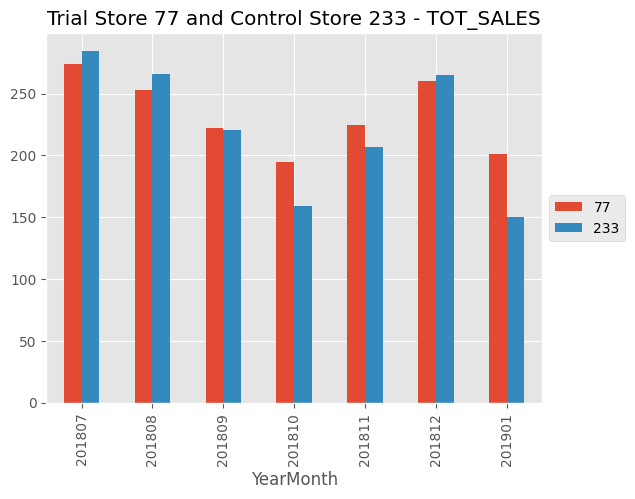

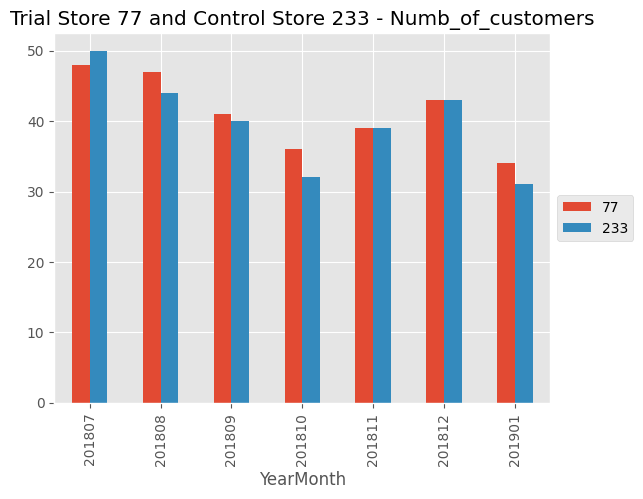

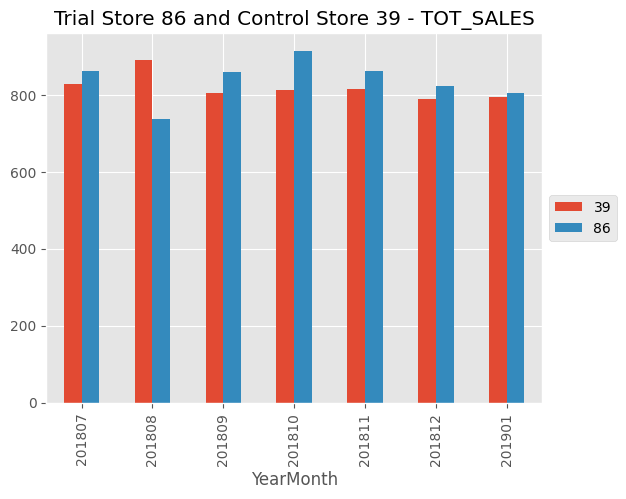

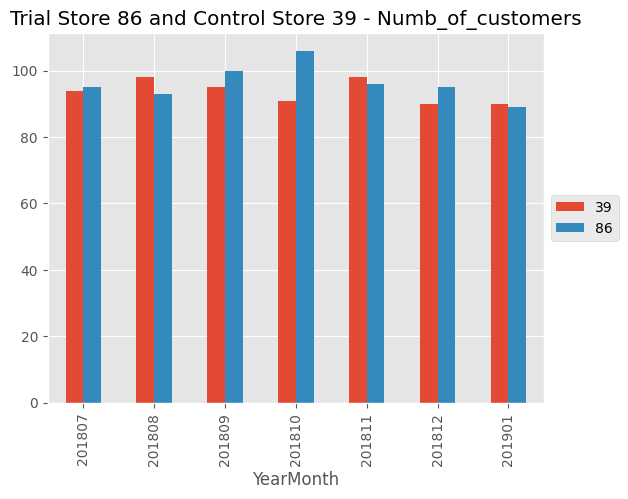

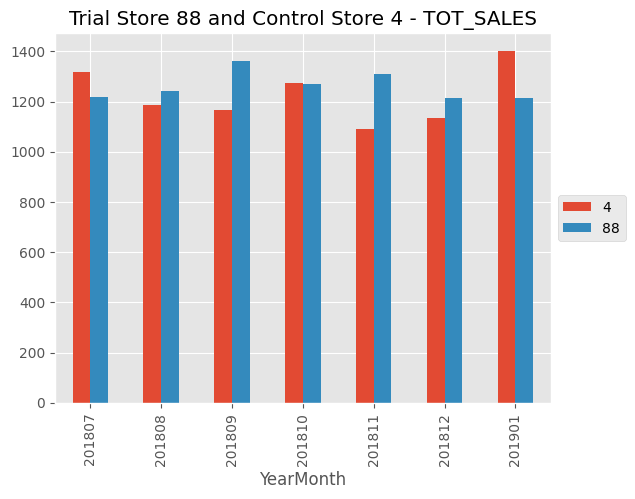

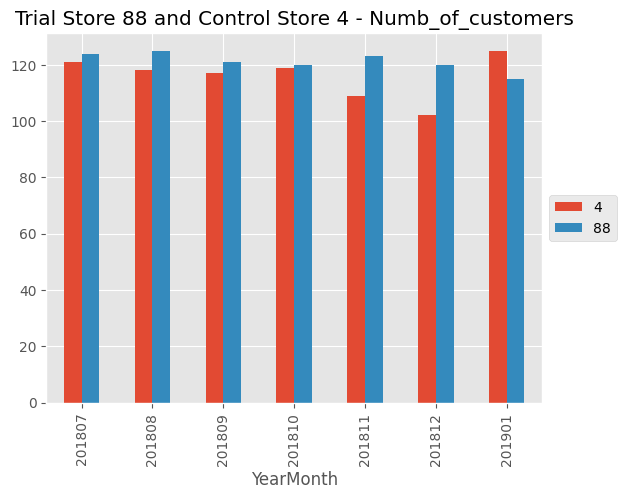

In [279]:
trial_control_dict = {77:233, 86:39, 88:4}
for key, val in trial_control_dict.items():
    preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR'].isin([key,val])]\
        .groupby(['YearMonth','STORE_NBR'])['TOT_SALES'].sum().unstack().plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(key)+" and Control Store "+str(val)+" - TOT_SALES")
    plt.show()
    preTrialsMeasuresFullObs[preTrialsMeasuresFullObs["STORE_NBR"].isin([key, val])]\
        .groupby(["YearMonth", "STORE_NBR"]).sum()["Numb_of_customers"].unstack().plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(key)+" and Control Store "+str(val)+" - Numb_of_customers")
    plt.show()
    #print('\n')

In [235]:
#Next, we'll have compare the performance of Trial store to Control stores during the trial period.
#To ensure their performance is comparable during trial period, we need to scale (multiply to ratio of trial/control)
#all of Control stores' performance to Trial stores'performance during pre-trial.
#Starting with TOT_SALEs

#ratio of Store 77 and its Control store
sales_ratio_77 = preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==77]['TOT_SALES'].sum()\
                 / preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==233]['TOT_SALES'].sum()

#ratio of Store 86 and its Control store
sales_ratio_86 = preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==86]['TOT_SALES'].sum()\
                 / preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==39]['TOT_SALES'].sum()

#ratio of Store 88 and its Control store
sales_ratio_88 = preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==88]['TOT_SALES'].sum()\
                 / preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==4]['TOT_SALES'].sum()

In [236]:
trialFullObs = yearMonthMetrics[(yearMonthMetrics['YearMonth']>=201902)&(yearMonthMetrics['YearMonth']<=201904)]
trialScaledSalesControlStore = trialFullObs[trialFullObs['STORE_NBR'].isin([233,39,4])][['YearMonth','STORE_NBR','TOT_SALES']]

def scaler(row):
    if row['STORE_NBR']==233:
        return row['TOT_SALES'] * sales_ratio_77
    if row['STORE_NBR']==39:
        return row['TOT_SALES'] * sales_ratio_86
    if row['STORE_NBR']==4:
        return row['TOT_SALES'] * sales_ratio_88

trialScaledSalesControlStore['ScaledSales'] = trialScaledSalesControlStore.apply(lambda row: scaler(row),axis=1)
trialScaledSalesControlStore

,YearMonth,STORE_NBR,TOT_SALES,ScaledSales
1816,201902,4,832.4,857.305417
1849,201902,39,610.4,623.666791
2033,201902,233,228.7,239.992191
2075,201903,4,1110.8,1144.035148
2108,201903,39,862.0,880.735213
2292,201903,233,180.6,189.517227
2334,201904,4,1159.1,1193.780285
2367,201904,39,805.4,822.905035
2551,201904,233,144.2,151.319956


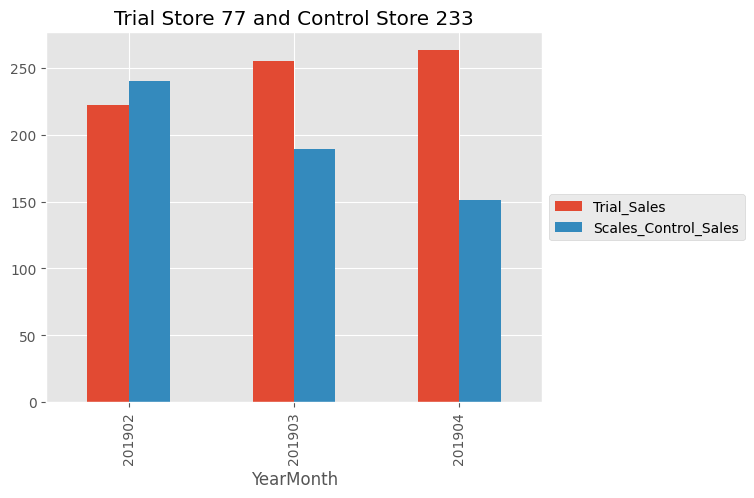

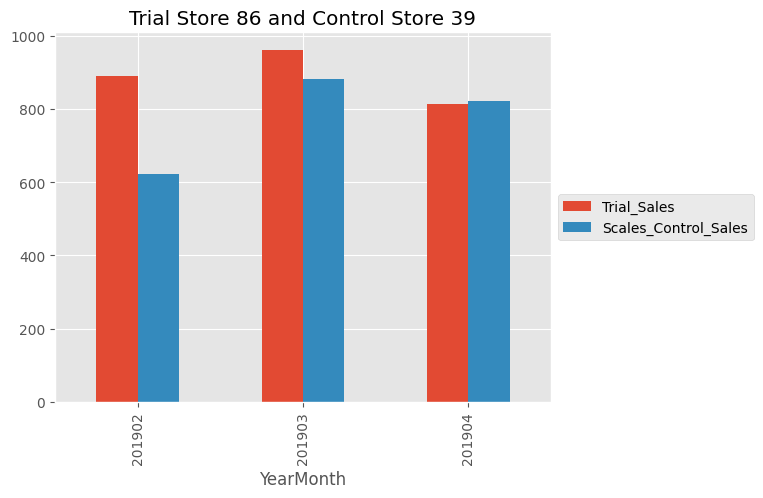

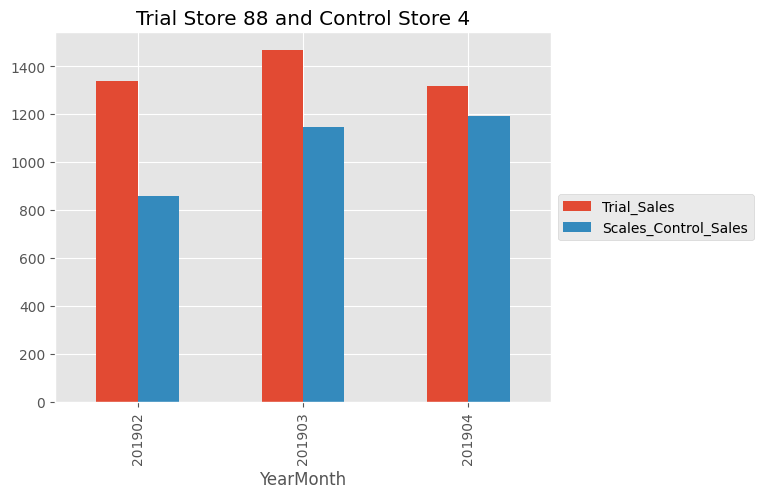

In [237]:
percentage_diff = {}

for trial, control in trial_control_dict.items():
    a = trialScaledSalesControlStore[trialScaledSalesControlStore['STORE_NBR']==control]
    b = trialFullObs[trialFullObs['STORE_NBR']==trial][['YearMonth','STORE_NBR','TOT_SALES']]
    percentage_diff[trial] = b['TOT_SALES'].sum() / a['ScaledSales'].sum()
    b[['YearMonth','TOT_SALES']].merge(a[['YearMonth','ScaledSales']],on='YearMonth')\
                                .set_index('YearMonth').rename(columns={'ScaledSales':'Scales_Control_Sales',
                                                                        'TOT_SALES':'Trial_Sales'}).plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))

In [238]:
percentage_diff

{77: 1.2754175887259145, 86: 1.144842496370208, 88: 1.290592810929977}

In [239]:
#Creating a compiled percentage_difference table
table1 = trialScaledSalesControlStore.sort_values(['STORE_NBR','YearMonth'],ascending=[False,True])\
    .reset_index(drop=True).drop('TOT_SALES',axis=1)
table2 = trialFullObs[trialFullObs['STORE_NBR'].isin([77,86,88])][['YearMonth','STORE_NBR','TOT_SALES']]
table2 = table2.sort_values(['STORE_NBR','YearMonth'],ascending=[True,True]).reset_index(drop=True)\
    .drop('YearMonth',axis=1)
scaledsales_vs_trial = pd.concat([table1,table2],axis=1)
scaledsales_vs_trial.columns = ["YEARMONTH",'ctrl_STORE_NBR', "ctrl_ScaledSales",
                                "trial_STORE_NBR", "trial_TOT_SALES"]
scaledsales_vs_trial['Sales_Percentage_Diff'] = (scaledsales_vs_trial['trial_TOT_SALES'] - scaledsales_vs_trial['ctrl_ScaledSales'])\
                                                / (scaledsales_vs_trial['ctrl_ScaledSales'])

def label_period(cell):
    if cell < 201902:
        return "pre"
    elif cell > 201904:
        return "post"
    else:
        return "trial"
scaledsales_vs_trial["trial_period"] = scaledsales_vs_trial["YEARMONTH"].apply(lambda cell: label_period(cell))
scaledsales_vs_trial

,YEARMONTH,ctrl_STORE_NBR,ctrl_ScaledSales,trial_STORE_NBR,trial_TOT_SALES,Sales_Percentage_Diff,trial_period
0,201902,233,239.992191,77,222.2,-0.074137,trial
1,201903,233,189.517227,77,255.1,0.346052,trial
2,201904,233,151.319956,77,263.5,0.741343,trial
3,201902,39,623.666791,86,888.8,0.425120,trial
4,201903,39,880.735213,86,961.2,0.091361,trial
5,201904,39,822.905035,86,814.4,-0.010335,trial
6,201902,4,857.305417,88,1339.6,0.562570,trial
7,201903,4,1144.035148,88,1467.0,0.282303,trial
8,201904,4,1193.780285,88,1317.0,0.103218,trial


Check significance of Trial minus Control stores TOT_SALES Percentage Difference Pre-Trial vs Trial.

`Step 1:` Check null hypothesis of 0 difference between control store's Pre-Trial and Trial period performance.

`Step 2:` Proof control and trial stores are similar statistically

- Check p-value of control store's Pre-Trial vs Trial store's Pre-Trial.
- If <5%, it is significantly different. If >5%, it is not significantly different (similar).

`Step 3:` After checking Null Hypothesis of first 2 step to be true, we can check Null Hypothesis of Percentage Difference between Trial and Control stores during pre-trial is the same as during trial.

In [240]:
yearMonthMetrics['ScaledSales'] = yearMonthMetrics.apply(lambda row: scaler(row),axis=1)
yearMonthMetrics[yearMonthMetrics['STORE_NBR']==233]

,YearMonth,STORE_NBR,TOT_SALES,Numb_of_customers,Numb_of_transactions,PROD_QTY,UNIT_PRICE,Trans_per_cust,Chips_per_cust,ScaledSales
220,201807,233,284.7,50,52,84,3.415385,1.040000,1.680000,298.757223
479,201808,233,266.1,44,46,74,3.547826,1.045455,1.681818,279.238837
738,201809,233,220.9,40,43,68,3.251163,1.075000,1.700000,231.807062
997,201810,233,159.3,32,32,48,3.321875,1.000000,1.500000,167.165527
1256,201811,233,206.5,39,40,61,3.447500,1.025641,1.564103,216.696054
1515,201812,233,265.4,43,45,70,3.784444,1.046512,1.627907,278.504274
1774,201901,233,150.5,31,31,41,3.654839,1.000000,1.322581,157.931022
2033,201902,233,228.7,43,45,67,3.420000,1.046512,1.558140,239.992191
2292,201903,233,180.6,35,36,52,3.441667,1.028571,1.485714,189.517227
2551,201904,233,144.2,27,29,41,3.503448,1.074074,1.518519,151.319956


In [267]:
#step1: Null hypothesis is that the control store's scaled_sales of trial period is THE SAME as the pre-trail period
#due to sample size are small so I apply Wilcoxon-Man-Whitney U-tets
import pingouin as pg

for num in [233,39,4]:
    pretrial_scaledSales_controlStore = yearMonthMetrics[yearMonthMetrics['STORE_NBR']==num]
    pretrial_scaledSales_controlStore = pretrial_scaledSales_controlStore.loc[pretrial_scaledSales_controlStore['YearMonth']<201902,:]\
                                    .reset_index(drop=True)[['ScaledSales']]
    trial_scaledSales_controlStore = scaledsales_vs_trial[scaledsales_vs_trial['ctrl_STORE_NBR']==num]
    trial_scaledSales_controlStore = trial_scaledSales_controlStore[['ctrl_ScaledSales']].reset_index(drop=True)
    data = pd.concat([pretrial_scaledSales_controlStore,trial_scaledSales_controlStore],axis=1)
    u_test = pg.mwu(x=data['ScaledSales'],y=data['ctrl_ScaledSales'],alternative='two-sided')
    print('Store', num)
    print(u_test,'\n')

Store 233
     U-val alternative     p-val       RBC      CLES
MWU   15.0   two-sided  0.383333 -0.428571  0.714286 

Store 39
     U-val alternative     p-val       RBC      CLES
MWU   12.5   two-sided  0.731657 -0.190476  0.595238 

Store 4
     U-val alternative     p-val       RBC      CLES
MWU   18.0   two-sided  0.116667 -0.714286  0.857143 



=> All p-values are greater than 0.05 so can't be rejected H0. There isn't any statistically significant difference between control store's scaled Pre-Trial and Trial period sales.

In [242]:
#step2: Null hypothesis is that control store's scaled_sales is THE SAME trial store's TOT_SALES in pre-trial period
#due to sample size are small so I apply Wilcoxon-Man-Whitney U-tets

for trial, control in trial_control_dict.items():
    pretrial_totalSales_trailStore = yearMonthMetrics[yearMonthMetrics['STORE_NBR']==trial]
    pretrial_totalSales_trailStore = pretrial_totalSales_trailStore.loc[pretrial_totalSales_trailStore['YearMonth']<201902,:]\
                                    .reset_index(drop=True)[['TOT_SALES']]
    pretrial_scaledSales_controlStore = yearMonthMetrics[yearMonthMetrics['STORE_NBR']==control]
    pretrial_scaledSales_controlStore = pretrial_scaledSales_controlStore.loc[pretrial_scaledSales_controlStore['YearMonth']<201902,:]\
                                    .reset_index(drop=True)[['ScaledSales']]
    data = pd.concat([pretrial_totalSales_trailStore,pretrial_scaledSales_controlStore],axis=1)
    u_test = pg.mwu(x=data['TOT_SALES'],y=data['ScaledSales'],alternative='two-sided')
    print('Trial store:', trial, ', Control store:', control)
    print(u_test,'\n')

Trial store: 77 , Control store: 233
     U-val alternative     p-val       RBC     CLES
MWU   22.0   two-sided  0.804779  0.102041  0.44898 

Trial store: 86 , Control store: 39
     U-val alternative     p-val       RBC     CLES
MWU   27.0   two-sided  0.804779 -0.102041  0.55102 

Trial store: 88 , Control store: 4
     U-val alternative     p-val       RBC     CLES
MWU   27.0   two-sided  0.804779 -0.102041  0.55102 



=> All p-values are greater than 0.05 so can't be rejected H0. There isn't any statistically significant difference between Trial store's total sales and Control store's scaled-sales performance during pre-trial.

In [243]:
#step 3: Null Hypothesis of Percentage Difference between Trial and Control stores during pre-trial is the same as during trial
#due to sample size are small so I apply Wilcoxon-Man-Whitney U-tets

for trial, control in trial_control_dict.items():
    controlStore = yearMonthMetrics[yearMonthMetrics['STORE_NBR']==control][['YearMonth','STORE_NBR','ScaledSales']].reset_index(drop=True)
    trialStore = yearMonthMetrics[yearMonthMetrics['STORE_NBR']==trial][['STORE_NBR','TOT_SALES']].reset_index(drop=True)
    controlTrialDiff = pd.concat([controlStore,trialStore],axis=1)
    controlTrialDiff['sales_pct_diff'] = (controlTrialDiff['TOT_SALES'] - controlTrialDiff['ScaledSales']) / controlTrialDiff['ScaledSales']
    pretrial_sales_diff = controlTrialDiff[controlTrialDiff['YearMonth']<201902][['sales_pct_diff']]
    pretrial_sales_diff.rename(columns={'sales_pct_diff':'pretrial_sales_pct_diff'},inplace=True)

    trial_sales_diff = controlTrialDiff[(controlTrialDiff['YearMonth']>=201902)&(controlTrialDiff['YearMonth']<=201904)][['sales_pct_diff']].reset_index(drop=True)
    trial_sales_diff.rename(columns={'sales_pct_diff':'trial_sales_pct_diff'},inplace=True)
    data = pd.concat([pretrial_sales_diff,trial_sales_diff],axis=1)
    u_test = pg.mwu(x=data['pretrial_sales_pct_diff'],y=data['trial_sales_pct_diff'],alternative='less')
    print('Trial store:', trial, ', Control store:', control)
    print(u_test, '\n')

Trial store: 77 , Control store: 233
     U-val alternative     p-val      RBC      CLES
MWU    5.0        less  0.133333  0.52381  0.761905 

Trial store: 86 , Control store: 39
     U-val alternative     p-val       RBC      CLES
MWU    7.0        less  0.258333  0.333333  0.666667 

Trial store: 88 , Control store: 4
     U-val alternative     p-val       RBC      CLES
MWU    2.0        less  0.033333  0.809524  0.904762 



=> We can see that, Trial Store 77 - Control Store 233 and Trial Store 86 - Control Store 39 have p-value > 0.05, Null hypothesis thus can't be rejected => Both pair store Percentage Difference between Trial and Control stores during pre-trial is the same as during trial

=> Trial Store 88 - Control Store 4 has the p-value < 0.05, Null hypothesis thus is rejected => Percentage Difference between Trial and Control stores during pre-trial is LESS than during trial or Percentage Difference during trial is GREATER than during pre-trial. Due to TOT_SALES of control store 4 is scaled so TOT_SALES in trial store 88 were increase.

In [244]:
preTrialsMeasuresFullObs

,YearMonth,STORE_NBR,TOT_SALES,Numb_of_customers,UNIT_PRICE,Trans_per_cust,Chips_per_cust
0,201807,1,191.6,48,3.316000,1.041667,1.229167
1,201807,2,143.1,37,3.207692,1.054054,1.189189
2,201807,3,1164.9,108,4.432090,1.240741,2.435185
3,201807,4,1318.3,121,4.369079,1.256198,2.495868
4,201807,5,774.4,88,3.426549,1.284091,2.568182
...,...,...,...,...,...,...,...
1808,201901,268,153.2,36,3.552778,1.000000,1.222222
1809,201901,269,923.0,104,3.418519,1.298077,2.596154
1810,201901,270,1009.8,110,3.458219,1.327273,2.654545
1811,201901,271,784.0,85,3.596330,1.282353,2.564706


In [245]:
#Next, we will look into Number of Customers

#ratio of Store 77 and its Control store
ncust_ratio_77 = preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==77]['Numb_of_customers'].sum()\
                 / preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==233]['Numb_of_customers'].sum()

#ratio of Store 86 and its Control store
ncust_ratio_86 = preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==86]['Numb_of_customers'].sum()\
                 / preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==39]['Numb_of_customers'].sum()

#ratio of Store 88 and its Control store
ncust_ratio_88 = preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==88]['Numb_of_customers'].sum()\
                 / preTrialsMeasuresFullObs[preTrialsMeasuresFullObs['STORE_NBR']==4]['Numb_of_customers'].sum()

In [246]:
trialScaledNcustControlStore = trialFullObs[trialFullObs['STORE_NBR'].isin([233,39,4])][['YearMonth','STORE_NBR','Numb_of_customers']]

def scaler1(row):
    if row['STORE_NBR']==233:
        return row['Numb_of_customers'] * ncust_ratio_77
    if row['STORE_NBR']==39:
        return row['Numb_of_customers'] * ncust_ratio_86
    if row['STORE_NBR']==4:
        return row['Numb_of_customers'] * ncust_ratio_88

trialScaledNcustControlStore['ScaledNcust'] = trialScaledNcustControlStore.apply(lambda row: scaler1(row),axis=1)
trialScaledNcustControlStore

,YearMonth,STORE_NBR,Numb_of_customers,ScaledNcust
1816,201902,4,86,89.923551
1849,201902,39,79,81.167683
2033,201902,233,43,44.387097
2075,201903,4,111,116.064118
2108,201903,39,96,98.634146
2292,201903,233,35,36.129032
2334,201904,4,112,117.109741
2367,201904,39,95,97.606707
2551,201904,233,27,27.870968


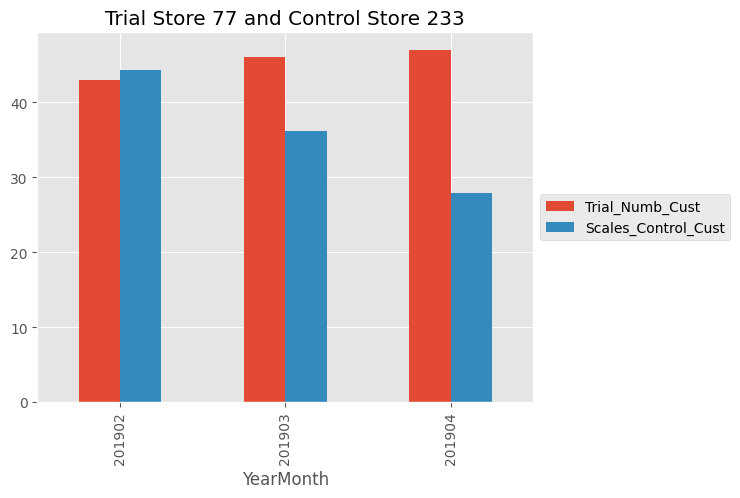

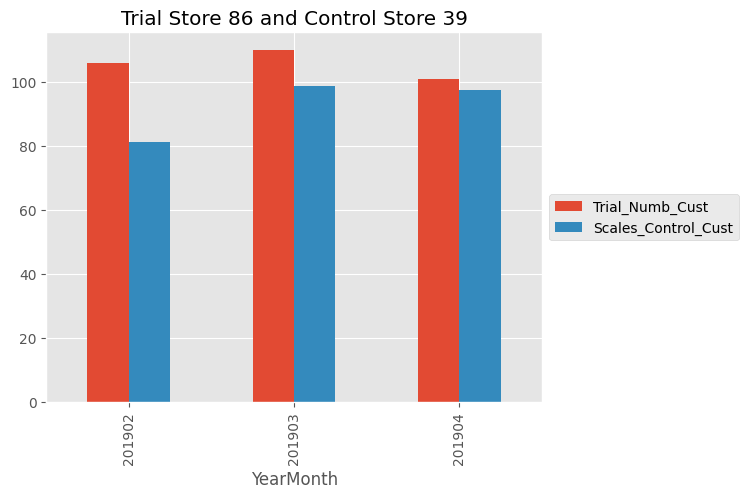

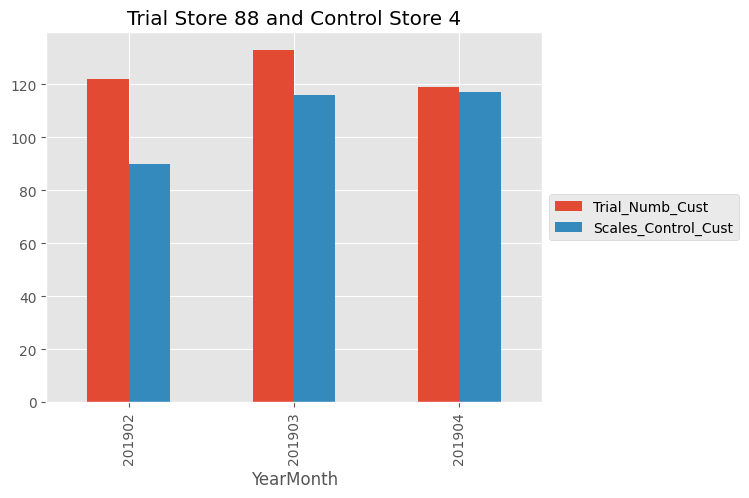

In [247]:
percentage_diff = {}

for trial, control in trial_control_dict.items():
    a = trialScaledNcustControlStore[trialScaledNcustControlStore['STORE_NBR']==control]
    b = trialFullObs[trialFullObs['STORE_NBR']==trial][['YearMonth','STORE_NBR','Numb_of_customers']]
    percentage_diff[trial] = b['Numb_of_customers'].sum() / a['ScaledNcust'].sum()
    b[['YearMonth','Numb_of_customers']].merge(a[['YearMonth','ScaledNcust']],on='YearMonth')\
                                .set_index('YearMonth').rename(columns={'ScaledNcust':'Scales_Control_Cust',
                                                                        'Numb_of_customers':'Trial_Numb_Cust'}).plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))

In [248]:
percentage_diff

{77: 1.254761904761905, 86: 1.1427189801077042, 88: 1.15754564328021}

In [249]:
#Creating a compiled percentage_difference table
table1 = trialScaledNcustControlStore.sort_values(['STORE_NBR','YearMonth'],ascending=[False,True])\
    .reset_index(drop=True).drop('Numb_of_customers',axis=1)
table2 = trialFullObs[trialFullObs['STORE_NBR'].isin([77,86,88])][['YearMonth','STORE_NBR','Numb_of_customers']]
table2 = table2.sort_values(['STORE_NBR','YearMonth'],ascending=[True,True]).reset_index(drop=True)\
    .drop('YearMonth',axis=1)
scaledNcust_vs_trial = pd.concat([table1,table2],axis=1)
scaledNcust_vs_trial.columns = ["YEARMONTH",'ctrl_STORE_NBR', "ctrl_ScaledNcust",
                                "trial_STORE_NBR", "trial_Numb_of_customers"]
scaledNcust_vs_trial['Ncust_Percentage_Diff'] = (scaledNcust_vs_trial['trial_Numb_of_customers'] - scaledNcust_vs_trial['ctrl_ScaledNcust'])\
                                                / (scaledNcust_vs_trial['ctrl_ScaledNcust'])

def label_period(cell):
    if cell < 201902:
        return "pre"
    elif cell > 201904:
        return "post"
    else:
        return "trial"
scaledNcust_vs_trial["trial_period"] = scaledNcust_vs_trial["YEARMONTH"].apply(lambda cell: label_period(cell))
scaledNcust_vs_trial

,YEARMONTH,ctrl_STORE_NBR,ctrl_ScaledNcust,trial_STORE_NBR,trial_Numb_of_customers,Ncust_Percentage_Diff,trial_period
0,201902,233,44.387097,77,43,-0.031250,trial
1,201903,233,36.129032,77,46,0.273214,trial
2,201904,233,27.870968,77,47,0.686343,trial
3,201902,39,81.167683,86,106,0.305938,trial
4,201903,39,98.634146,86,110,0.115232,trial
5,201904,39,97.606707,86,101,0.034765,trial
6,201902,4,89.923551,88,122,0.356708,trial
7,201903,4,116.064118,88,133,0.145918,trial
8,201904,4,117.109741,88,119,0.016141,trial


Check significance of Trial minus Control stores Numb_of_Customers Percentage Difference Pre-Trial vs Trial.

`Step 1:` Check null hypothesis of 0 difference between control store's Pre-Trial and Trial period performance.

`Step 2:` Proof control and trial stores are similar statistically

`Step 3:` After checking Null Hypothesis of first 2 step to be true, we can check Null Hypothesis of Percentage Difference between Trial and Control stores during pre-trial is the same as during trial.

In [250]:
yearMonthMetrics['ScaledNcust'] = yearMonthMetrics.apply(lambda row: scaler1(row),axis=1)
yearMonthMetrics[yearMonthMetrics['STORE_NBR']==233]

,YearMonth,STORE_NBR,TOT_SALES,Numb_of_customers,Numb_of_transactions,PROD_QTY,UNIT_PRICE,Trans_per_cust,Chips_per_cust,ScaledSales,ScaledNcust
220,201807,233,284.7,50,52,84,3.415385,1.040000,1.680000,298.757223,51.612903
479,201808,233,266.1,44,46,74,3.547826,1.045455,1.681818,279.238837,45.419355
738,201809,233,220.9,40,43,68,3.251163,1.075000,1.700000,231.807062,41.290323
997,201810,233,159.3,32,32,48,3.321875,1.000000,1.500000,167.165527,33.032258
1256,201811,233,206.5,39,40,61,3.447500,1.025641,1.564103,216.696054,40.258065
1515,201812,233,265.4,43,45,70,3.784444,1.046512,1.627907,278.504274,44.387097
1774,201901,233,150.5,31,31,41,3.654839,1.000000,1.322581,157.931022,32.000000
2033,201902,233,228.7,43,45,67,3.420000,1.046512,1.558140,239.992191,44.387097
2292,201903,233,180.6,35,36,52,3.441667,1.028571,1.485714,189.517227,36.129032
2551,201904,233,144.2,27,29,41,3.503448,1.074074,1.518519,151.319956,27.870968


In [270]:
#step1: Null hypothesis is that the control store's scaled_Ncust of trial period is THE SAME as the pre-trail period
#due to sample size are small so I apply Wilcoxon-Man-Whitney U-tets
import pingouin as pg

for num in [233,39,4]:
    pretrial_scaledNcust_controlStore = yearMonthMetrics[yearMonthMetrics['STORE_NBR']==num]
    pretrial_scaledNcust_controlStore = pretrial_scaledNcust_controlStore.loc[pretrial_scaledNcust_controlStore['YearMonth']<201902,:]\
                                    .reset_index(drop=True)[['ScaledNcust']]
    trial_scaledNcust_controlStore = scaledNcust_vs_trial[scaledsales_vs_trial['ctrl_STORE_NBR']==num]
    trial_scaledNcust_controlStore = trial_scaledNcust_controlStore[['ctrl_ScaledNcust']].reset_index(drop=True)
    data = pd.concat([pretrial_scaledNcust_controlStore,trial_scaledNcust_controlStore],axis=1)
    u_test = pg.mwu(x=data['ScaledNcust'],y=data['ctrl_ScaledNcust'],alternative='two-sided')
    print('Store', num)
    print(u_test,'\n')

Store 233
     U-val alternative     p-val       RBC      CLES
MWU   14.5   two-sided  0.423622 -0.380952  0.690476 

Store 39
     U-val alternative     p-val       RBC      CLES
MWU   11.5   two-sided  0.908436 -0.095238  0.547619 

Store 4
     U-val alternative     p-val       RBC      CLES
MWU   17.0   two-sided  0.183333 -0.619048  0.809524 



=> All p-values are greater than 0.05 so can't be rejected H0. There isn't any statistically significant difference between control store's scaled Pre-Trial and Trial period number of customers.

In [275]:
#step2: Null hypothesis is that control store's scaled_ncust is THE SAME trial store's number_of_customers in pre-trial period
#due to sample size are small so I apply Wilcoxon-Man-Whitney U-tets

for trial, control in trial_control_dict.items():
    pretrial_ncust_trailStore = yearMonthMetrics[yearMonthMetrics['STORE_NBR']==trial]
    pretrial_ncust_trailStore = pretrial_ncust_trailStore.loc[pretrial_ncust_trailStore['YearMonth']<201902,:]\
                                    .reset_index(drop=True)[['Numb_of_customers']]
    pretrial_ncust_controlStore = yearMonthMetrics[yearMonthMetrics['STORE_NBR']==control]
    pretrial_ncust_controlStore = pretrial_ncust_controlStore.loc[pretrial_ncust_controlStore['YearMonth']<201902,:]\
                                    .reset_index(drop=True)[['ScaledNcust']]
    data = pd.concat([pretrial_ncust_trailStore,pretrial_ncust_controlStore],axis=1)
    u_test = pg.mwu(x=data['Numb_of_customers'],y=data['ScaledNcust'],alternative='two-sided')
    print('Trial store:', trial, ', Control store:', control)
    print(u_test,'\n')

Trial store: 77 , Control store: 233
     U-val alternative  p-val       RBC      CLES
MWU   25.0   two-sided    1.0 -0.020408  0.510204 

Trial store: 86 , Control store: 39
     U-val alternative     p-val       RBC      CLES
MWU   23.0   two-sided  0.897992  0.061224  0.469388 

Trial store: 88 , Control store: 4
     U-val alternative     p-val       RBC      CLES
MWU   20.0   two-sided  0.608886  0.183673  0.408163 



=> All p-values are greater than 0.05 so can't be rejected H0. There isn't any statistically significant difference between Trial store's number of customers and Control store's scaled-ncust performance during pre-trial.

In [276]:
#step 3: Null Hypothesis of Percentage Difference between Trial and Control stores during pre-trial is the same as during trial
#due to sample size are small so I apply Wilcoxon-Man-Whitney U-tets

for trial, control in trial_control_dict.items():
    controlStore = yearMonthMetrics[yearMonthMetrics['STORE_NBR']==control][['YearMonth','STORE_NBR','ScaledNcust']].reset_index(drop=True)
    trialStore = yearMonthMetrics[yearMonthMetrics['STORE_NBR']==trial][['STORE_NBR','Numb_of_customers']].reset_index(drop=True)
    controlTrialDiff = pd.concat([controlStore,trialStore],axis=1)
    controlTrialDiff['ncust_pct_diff'] = (controlTrialDiff['Numb_of_customers'] - controlTrialDiff['ScaledNcust']) / controlTrialDiff['ScaledNcust']
    pretrial_ncust_diff = controlTrialDiff[controlTrialDiff['YearMonth']<201902][['ncust_pct_diff']]
    pretrial_ncust_diff.rename(columns={'ncust_pct_diff':'pretrial_ncust_pct_diff'},inplace=True)

    trial_ncust_diff = controlTrialDiff[(controlTrialDiff['YearMonth']>=201902)&(controlTrialDiff['YearMonth']<=201904)][['ncust_pct_diff']].reset_index(drop=True)
    trial_ncust_diff.rename(columns={'ncust_pct_diff':'trial_cust_pct_diff'},inplace=True)
    data = pd.concat([pretrial_ncust_diff,trial_ncust_diff],axis=1)
    u_test = pg.mwu(x=data['pretrial_ncust_pct_diff'],y=data['trial_cust_pct_diff'],alternative='less')
    print('Trial store:', trial, ', Control store:', control)
    print(u_test, '\n')

Trial store: 77 , Control store: 233
     U-val alternative     p-val       RBC      CLES
MWU    4.5        less  0.104308  0.571429  0.785714 

Trial store: 86 , Control store: 39
     U-val alternative     p-val       RBC      CLES
MWU    2.0        less  0.033333  0.809524  0.904762 

Trial store: 88 , Control store: 4
     U-val alternative     p-val       RBC      CLES
MWU    2.0        less  0.033333  0.809524  0.904762 



=> We can see that, Trial Store 77 - Control Store 233 has p-value > 0.05, Null hypothesis thus can't be rejected => Percentage Difference in number of customers between Trial and Control stores during pre-trial is the same as during trial

=> Trial Store 88 - Control Store 4 and Trial Store 86 - Control Store 39 have the p-value < 0.05, Null hypothesis thus is rejected => Percentage Difference in number of customers between Trial and Control stores during pre-trial is LESS than during trial or Percentage Difference during trial is GREATER than during pre-trial. Due to Numb_of_cust of control store 4 and 39 are scaled so number_of_cust in trial store 88 and 86 were increase.

`Conclusion:`
- We have found control stores 233, 39, 4 for trial stores 77, 86 and 88 respectively.
- The results for trial store 88 during the trial period show a significant increase in TOT_SALES and Number_of_Customers.
- Trial store 86 during the trial period show a significant increase in Number_of_Customers.
- Trial store 77 during the trial period has no significant difference.